In [1]:
import numpy as np
import pandas as pd
from os.path import exists

import seaborn as sns
import helper_visualize as help_vis
import helper_data_load as help_load
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [2]:
model_list = ["BaggingRegressor(random_state=42)", "ElasticNetCV(random_state=42)", "ensemble_LinearRegression()", "GradientBoostingRegressor(random_state=42)","LassoCV(random_state=42)", "LinearRegression()", "RandomForestRegressor(random_state=42)", "SVR()"]
feat_sel_meth_list = [ "mrmr5","corr-1", "corr-2", "mim", "f_reg"] # "corr-1","randFor_feat_sel", "f_reg"

In [10]:
def rename_heat_map(df):
    ml_names = ["Bagging R.", "ElasticNet", "Ensemble LR", "Gradient Boosting R.", "Lasso R.", "Linear R.", "Random Forest R.", "SVR"]
    dict_ml_names = dict(zip(list(df.index), ml_names))

    fs_names = [ "MRMR 5","Spearman", "Pearson", "MIM", "F-Reg."] # "RF-VI", "F-Reg"
    dict_fs_names = dict(zip(list(df.columns), fs_names))
    print(dict_fs_names)
    df = df.rename(columns=dict_fs_names)
    df = df.rename(index=dict_ml_names)
    return df

def get_heatmap(met_df, metric, cohort, direction, kind):
    ax = sns.heatmap(met_df, annot=True, fmt=".3", cmap= sns.color_palette("Blues", as_cmap=True))# , cmap="YlGnBu"
    ax.set(xlabel="", ylabel="")
    ax.xaxis.tick_top()
    ax.set_title(direction + " " + kind + " " + cohort + " - Error "+str(metric))
    plt.show()

def discovery_heatmap(feat_sel_method_list, direction, kind, cohort):
    folder_base_path = "../../Data/Results/"
    if cohort == "Disc": cohort_folder = "disc_preds_valeria"
    elif cohort == "Vali": cohort_folder = "vali_preds_valeria"
    if direction == "IC": 
        file_base = "cv_preds_"
        vali = "IUCPQ"
    elif direction == "CI": 
        file_base = "switch_cv_preds_"
        vali = "CHUM"
    import_path = folder_base_path + direction + "/" + kind + "/" + cohort_folder + "/preds/" 
    metric="c"
    model_list = ["BaggingRegressor(random_state=42)", "ElasticNetCV(random_state=42)", "ensemble_LinearRegression()", "GradientBoostingRegressor(random_state=42)","LassoCV(random_state=42)", "LinearRegression()", "RandomForestRegressor(random_state=42)", "SVR()"]
    metric_df = pd.DataFrame(index=model_list, columns=feat_sel_meth_list)
    for model_temp in model_list:
        for feat_sel_temp in feat_sel_method_list:
            if feat_sel_temp == "corr-2": 
                corr_meth = -2
            else: 
                corr_meth = -1
            if feat_sel_temp in ["corr-1", "corr-2", "mrmr5"]:
                    file_path = import_path + file_base +model_temp + "_" + feat_sel_temp + ".csv"
            else:
                file_path = import_path  + file_base + model_temp + "_" + feat_sel_temp + str(corr_meth) + ".csv"
            metric_df = help_vis.eval_disc(file_path=file_path, model_temp=model_temp, feat_sel_temp=feat_sel_temp, metric_df=metric_df, metric=metric)
        
    metric_df = rename_heat_map(metric_df)
    get_heatmap(metric_df, metric, cohort, direction, kind)
    return metric_df

# Validation Set

In [4]:
def validation_heatmap(feat_sel_method_list, direction, kind, cohort):
    folder_base_path = "../../Data/Results/"
    if cohort == "Disc": cohort_folder = "disc_preds_valeria"
    elif cohort == "Vali": cohort_folder = "vali_preds_valeria"
    if kind == "Rad":
        ecog = False
    elif kind == "Rad+ecog":
        ecog = True
    if direction == "IC": 
        file_base = "cv_preds_"
        vali = "CHUM"
        data_norm, _ = help_load.get_norm_data(local=True, ecog=ecog)
    elif direction == "CI": 
        file_base = "switch_cv_preds_"
        vali = "IUCPQ"
        _, data_norm = help_load.get_norm_data(local=True, ecog=ecog)
    import_path = folder_base_path + direction + "/" + kind + "/" + cohort_folder + "/preds/" 
    metric="c"
    model_list = ["BaggingRegressor(random_state=42)", "ElasticNetCV(random_state=42)", "ensemble_LinearRegression()", "GradientBoostingRegressor(random_state=42)","LassoCV(random_state=42)", "LinearRegression()", "RandomForestRegressor(random_state=42)", "SVR()"]
    vali_metric_df = pd.DataFrame(index=model_list, columns=feat_sel_meth_list)
    y_vali = data_norm["os_days"]
    for model_temp in model_list:
        for feat_sel_temp in feat_sel_method_list:
            if feat_sel_temp == "corr-2": 
                corr_meth = -2
            else: 
                corr_meth = -1
            if feat_sel_temp in ["corr-1", "corr-2", "mrmr5"]:
                file_path_vali = import_path + "preds_" + feat_sel_temp + "on_vali_" + vali + ".csv"
            else:
                file_path_vali = import_path + "preds_" + feat_sel_temp + str(corr_meth) + "on_vali_" + vali + ".csv"
            
            vali_metric_df = help_vis.eval_vali(file_path=file_path_vali, model_temp=model_temp, feat_sel_temp=feat_sel_temp, corr_meth_temp=corr_meth, metric_df=vali_metric_df, metric=metric, y_vali=y_vali, vali_set=vali)

    vali_metric_df = rename_heat_map(vali_metric_df)
    get_heatmap(vali_metric_df, metric, cohort, direction, kind)
    return vali_metric_df


## IC Rad

{'mrmr5': 'MRMR 5', 'corr-1': 'Spearman', 'corr-2': 'Pearson', 'mim': 'MIM', 'f_reg': 'F-Reg.'}


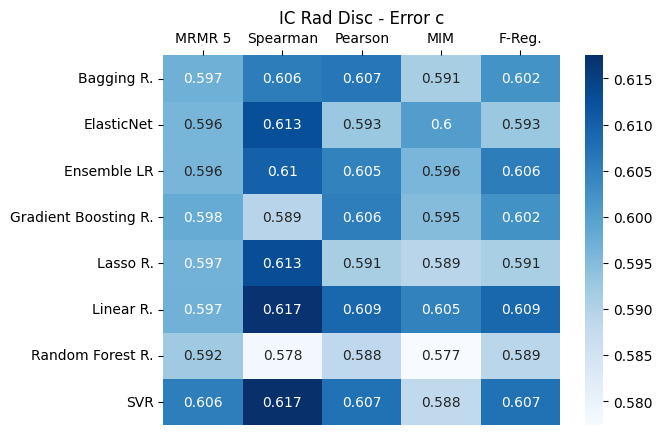

223 patients with clinical and radiation data for CHUM.
162 patients with clinical and radiation data for IUCPQ.
{'mrmr5': 'MRMR 5', 'corr-1': 'Spearman', 'corr-2': 'Pearson', 'mim': 'MIM', 'f_reg': 'F-Reg.'}


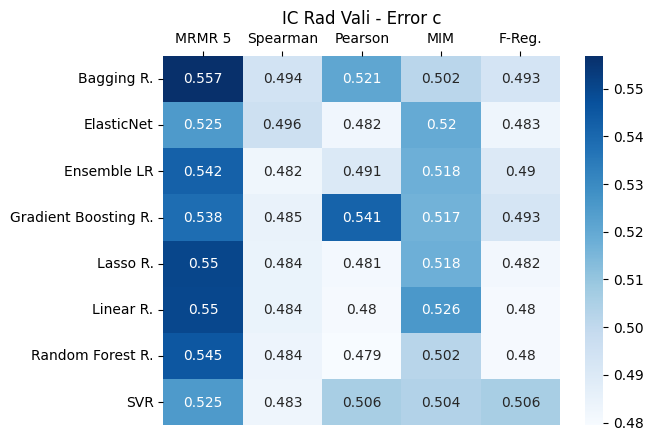

In [5]:
IC_rad_disc_df = discovery_heatmap(feat_sel_meth_list, "IC", "Rad", "Disc")
IC_rad_vali_df = validation_heatmap(feat_sel_meth_list, "IC", "Rad", "Vali")

In [6]:
print("IC Rad Disc")
print(IC_rad_disc_df.median(axis=1).round(3))
print(IC_rad_disc_df.std(axis=1).round(3))
print("IC Rad Vali")
print(IC_rad_vali_df.median(axis=1).round(3))
print(IC_rad_vali_df.std(axis=1).round(3))

IC Rad Disc
Bagging R.              0.602
ElasticNet              0.596
Ensemble LR             0.605
Gradient Boosting R.    0.598
Lasso R.                0.591
Linear R.               0.609
Random Forest R.        0.588
SVR                     0.607
dtype: float64
Bagging R.              0.006
ElasticNet              0.008
Ensemble LR             0.006
Gradient Boosting R.    0.006
Lasso R.                0.010
Linear R.               0.007
Random Forest R.        0.007
SVR                     0.011
dtype: float64
IC Rad Vali
Bagging R.              0.502
ElasticNet              0.496
Ensemble LR             0.491
Gradient Boosting R.    0.517
Lasso R.                0.484
Linear R.               0.484
Random Forest R.        0.484
SVR                     0.506
dtype: float64
Bagging R.              0.027
ElasticNet              0.020
Ensemble LR             0.025
Gradient Boosting R.    0.026
Lasso R.                0.031
Linear R.               0.032
Random Forest R.        0.028
S

In [4]:
for j in range(1, 50):
    for i in range(1, j+1):
        print(i)

1
1
2
1
2
3
1
2
3
4
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
2

## IC RAD + ECOG + PDL1

{'mrmr5': 'MRMR 5', 'corr-1': 'Spearman', 'corr-2': 'Pearson', 'mim': 'MIM', 'f_reg': 'F-Reg.'}


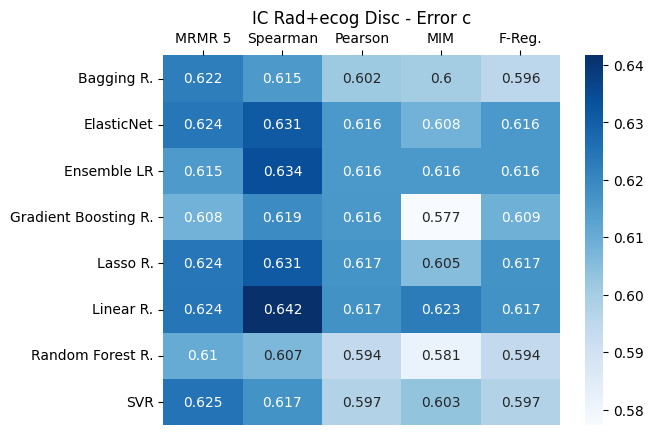

In [7]:
IC_rad_ecog_disc_df = discovery_heatmap(feat_sel_meth_list, "IC", "Rad+ecog", "Disc")


223 patients with clinical and radiation data for CHUM.
192 patients with os, radiation, ecog and pdl1 data for CHUM.
164 patients with clinical and radiation data for IUCPQ.
128 patients with os, radiation, ecog and pdl1 data for IUCPQ.
{'mrmr5': 'MRMR 5', 'corr-1': 'Spearman', 'corr-2': 'Pearson', 'mim': 'MIM', 'f_reg': 'F-Reg.'}


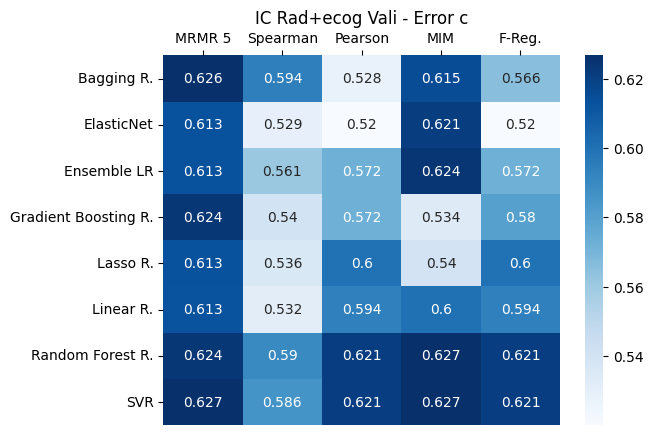

In [8]:
IC_rad_ecog_vali_df = validation_heatmap(feat_sel_meth_list, "IC", "Rad+ecog", "Vali")

## CI Rad

{'mrmr5': 'MRMR 5', 'corr-1': 'Spearman', 'corr-2': 'Pearson', 'mim': 'MIM', 'f_reg': 'F-Reg.'}


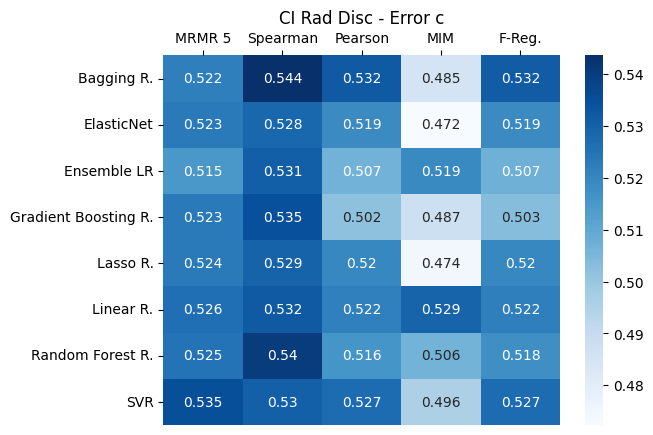

223 patients with clinical and radiation data for CHUM.
162 patients with clinical and radiation data for IUCPQ.
{'mrmr5': 'MRMR 5', 'corr-1': 'Spearman', 'corr-2': 'Pearson', 'mim': 'MIM', 'f_reg': 'F-Reg.'}


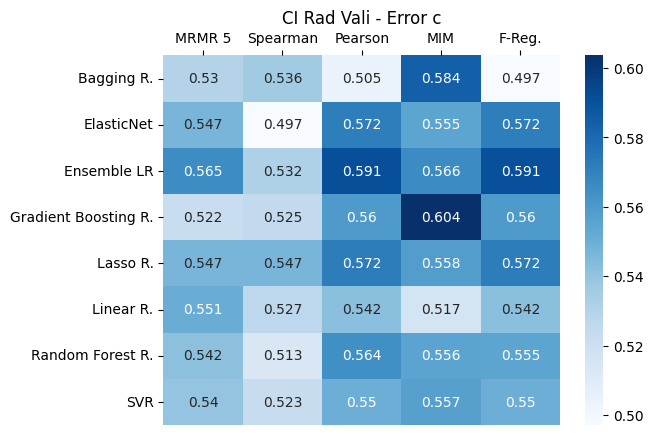

In [9]:
CI_rad_disc_df = discovery_heatmap(feat_sel_meth_list, "CI", "Rad", "Disc")
CI_rad_vali_df = validation_heatmap(feat_sel_meth_list, "CI", "Rad", "Vali")

## CI Rad + ecog+ pdl1

{'mrmr5': 'MRMR 5', 'corr-1': 'Spearman', 'corr-2': 'Pearson', 'mim': 'MIM', 'f_reg': 'F-Reg.'}


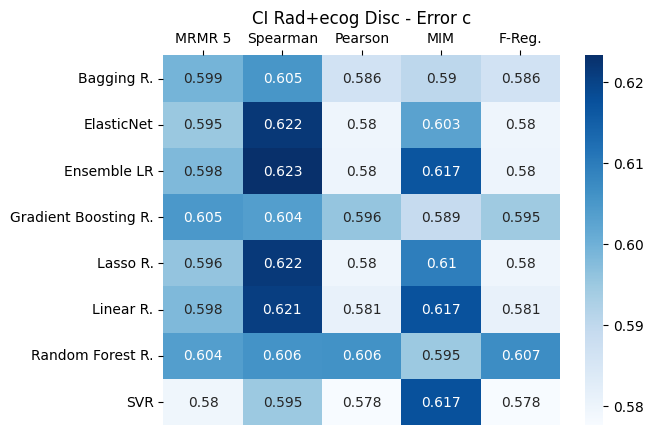

223 patients with clinical and radiation data for CHUM.
192 patients with os, radiation, ecog and pdl1 data for CHUM.
164 patients with clinical and radiation data for IUCPQ.
128 patients with os, radiation, ecog and pdl1 data for IUCPQ.
{'mrmr5': 'MRMR 5', 'corr-1': 'Spearman', 'corr-2': 'Pearson', 'mim': 'MIM', 'f_reg': 'F-Reg.'}


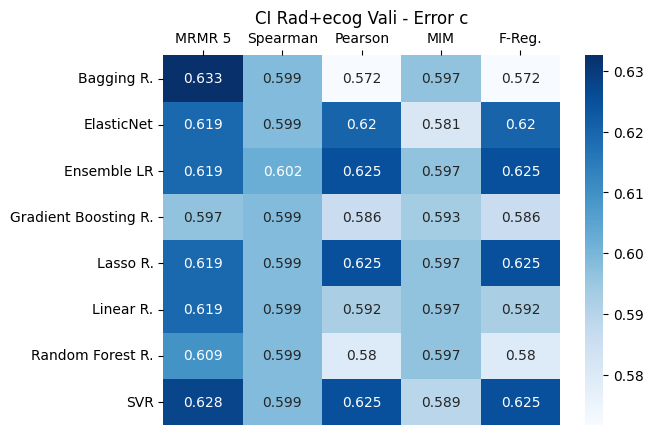

In [11]:
CI_rad_disc_df = discovery_heatmap(feat_sel_meth_list, "CI", "Rad+ecog", "Disc")
CI_rad_vali_df = validation_heatmap(feat_sel_meth_list, "CI", "Rad+ecog", "Vali")

Random Forest Variable Importance (RF-VI): To select the k most important features, first, all features are fit to a random forest. Based on that random forest the features are ranked regarding the mean impurity decrease within each tree.


## CI Bagging + Corr1 Feature to c index

In [10]:
nr_feat_c = pd.read_csv("../../Data/Results/CI/Rad/disc_preds_valeria/os_days_results/os_days_results_CHUM_discovery_Bagging_corr-1_std_scl_1-100.csv")

<AxesSubplot: title={'center': 'Spearman & Bagging'}, xlabel='nr_feat', ylabel='c_idx_bagging'>

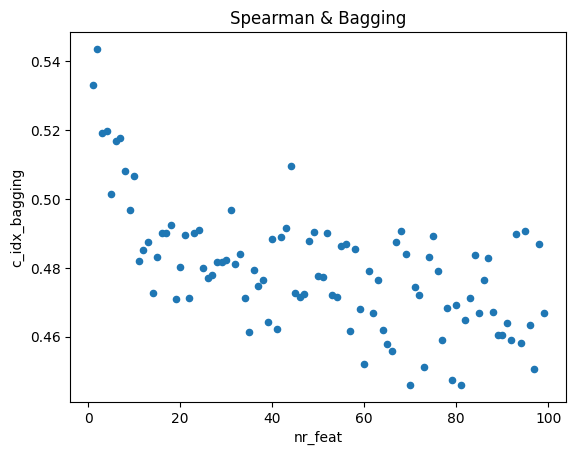

In [12]:
nr_feat_c.plot.scatter(x="nr_feat", y = "c_idx_bagging", title="Spearman & Bagging")

# Nr. Features

In [6]:
folder_base_path = "../../Data/Results/"
disc_folder = "disc_preds_valeria/"
vali_folder = "vali_preds_valeria/"
predictions_folder = "preds/"
c_idxs_folder = "c_idxs/"
disc_file_base = "cv_preds_"
vali_file_base = "preds_"
vali_file_part2 = "on_vali_CHUM.csv"

c_idx_files = "os_days_results_best_model_validation_CHUM_"
c_idx_files_back = "_1-100"

In [ ]:
def eval_disc(file_path, model_temp, feat_sel_temp, metric_df, metric):
    df_temp = pd.read_csv(file_path, index_col=0)
    df_temp_renamed = rename_pred_col(df_temp, model_temp)
    c_temp = calc_metric(df_temp_renamed.y_test_cv, df_temp_renamed["y_pred_cv_"+model_temp], metric=metric)
    metric_df.loc[model_temp, feat_sel_temp] = c_temp
    metric_df = metric_df.astype(float)
    return metric_df

In [24]:
model_list = ["BaggingRegressor(random_state=42)", "ElasticNetCV(random_state=42)", "Ensemble Lin. R.", "GradientBoostingRegressor(random_state=42)","LassoCV(random_state=42)", "LinearRegression()", "RandomForestRegressor(random_state=42)", "SVR(kernel='linear')"]

feature_df = pd.DataFrame(index=model_list, columns=feat_sel_meth_list)
for model_temp in model_list:
    for feat_sel_temp in feat_sel_meth_list:
        if feat_sel_temp == "corr-2": 
            corr_meth = -2
        else: 
            corr_meth = -1
        if feat_sel_temp in ["corr-1", "corr-2", "mrmr5"]:
            file_path = folder_base_path+vali_folder+ c_idxs_folder+ c_idx_files+feat_sel_temp+c_idx_files_back+".csv"
        else:
            file_path = folder_base_path+vali_folder+c_idxs_folder+c_idx_files+feat_sel_temp+str(corr_meth)+c_idx_files_back+".csv"
        df_temp = pd.read_csv(file_path, index_col=0)
        df_temp = df_temp["Nr. Features"]
        feature_df[feat_sel_temp] = df_temp

feature_df = rename_heat_map(feature_df)
feature_df

,MRMR 5,Spearman,Pearson,MIM,F-Reg
Bagging R.,3.0,63.0,40.0,71.0,71.0
ElasticNet,1.0,5.0,12.0,83.0,11.0
Ensemble LR,2.0,3.0,40.0,31.0,38.0
Gradient Boosting R.,5.0,44.0,10.0,36.0,45.0
Lasso R.,4.0,4.0,11.0,56.0,10.0
Linear R.,4.0,4.0,31.0,23.0,30.0
Random Forest R.,6.0,5.0,10.0,83.0,9.0
SVR,1.0,5.0,7.0,79.0,6.0


Text(0.5, 1.0, 'Nr. of Features')

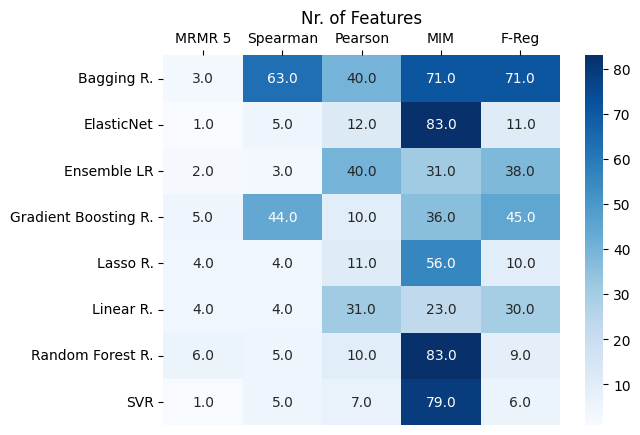

In [31]:
ax = sns.heatmap(feature_df, annot=True, fmt=".3", cmap= sns.color_palette("Blues", as_cmap=True)) # , cmap="YlGnBu"
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.set_title("Nr. of Features")